# Analyzing Citi Bike Data
## by Shakhawat Hassan

## Shakhawat Hassan

## Introduction
Citi bike is a public bike-sharing system and it is now owned by Lyft. Lyft operates Citi bike around New York City, and Jersey City, NJ. Citi bike bicycle sharing system was opened in May 2013 with 332 stations and 6,000 bikes. Due to the high volume of growth rate, Citi bike is expanding around the five boroughs of NYC. As of July 2017, there are 130,000 annual subscribers. The average is 48,315 rides per day in 2018. Rides per day/week/month/year are still growing rapidly.
* Due to staying home order for Covid-19 there might be a decrease in rides per day.

In [1]:
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Preliminary Wrangling

In [2]:
df = pd.read_csv('2020feb_citibike.csv')

In [3]:
df.shape 

(22962, 15)

In [4]:
#22,962 rows and 15 columns

In [5]:
df.isnull().sum()       #nulls checking

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [6]:
df.duplicated().sum()          #There is no duplicate

0

In [7]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
22957,262,2020-02-29 23:40:53.1620,2020-02-29 23:45:15.3180,3639,Harborside,40.719252,-74.034234,3214,Essex Light Rail,40.712774,-74.036486,42467,Subscriber,1967,1
22958,216,2020-02-29 23:41:01.3350,2020-02-29 23:44:38.0350,3186,Grove St PATH,40.719586,-74.043117,3483,Montgomery St,40.719420,-74.050990,42377,Subscriber,1958,1
22959,101,2020-02-29 23:45:22.1700,2020-02-29 23:47:03.2970,3214,Essex Light Rail,40.712774,-74.036486,3681,Grand St,40.715178,-74.037683,42485,Subscriber,1967,1
22960,279,2020-02-29 23:47:56.8380,2020-02-29 23:52:36.6400,3186,Grove St PATH,40.719586,-74.043117,3483,Montgomery St,40.719420,-74.050990,42531,Subscriber,1988,1
22961,212,2020-02-29 23:49:18.4510,2020-02-29 23:52:50.7490,3184,Paulus Hook,40.714145,-74.033552,3276,Marin Light Rail,40.714584,-74.042817,42385,Subscriber,1967,1


In [8]:
df['bikeid'].count()

22962

#### 22962 users who rented citi bikes in February 2020

In [9]:
df['tripduration'].nlargest() 

4994     1495458
4860      345608
19204     290697
6293      245410
12027     221936
Name: tripduration, dtype: int64

In [10]:
df.info() #data type checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             22962 non-null  int64  
 1   starttime                22962 non-null  object 
 2   stoptime                 22962 non-null  object 
 3   start station id         22962 non-null  int64  
 4   start station name       22962 non-null  object 
 5   start station latitude   22962 non-null  float64
 6   start station longitude  22962 non-null  float64
 7   end station id           22962 non-null  int64  
 8   end station name         22962 non-null  object 
 9   end station latitude     22962 non-null  float64
 10  end station longitude    22962 non-null  float64
 11  bikeid                   22962 non-null  int64  
 12  usertype                 22962 non-null  object 
 13  birth year               22962 non-null  int64  
 14  gender                

In [11]:
df.mean() #mean checking

tripduration                 665.692927
start station id            3307.954446
start station latitude        40.722765
start station longitude      -74.046948
end station id              3308.074819
end station latitude          40.722323
end station longitude        -74.046393
bikeid                     41376.724153
birth year                  1981.129997
gender                         1.195976
dtype: float64

In [12]:
df.describe() #stats checking

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,2.296200e+04,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000
mean,6.656929e+02,3307.954446,40.722765,-74.046948,3308.074819,40.722323,-74.046393,41376.724153,1981.129997,1.195976
std,1.092407e+04,184.877308,0.006696,0.011348,189.016475,0.006509,0.011213,3551.166582,10.300961,0.494564
min,6.100000e+01,3184.000000,40.711130,-74.083639,83.000000,40.683826,-74.083639,17273.000000,1888.000000,0.000000
25%,2.260000e+02,3195.000000,40.718355,-74.050656,3194.000000,40.718355,-74.050444,42192.000000,1976.000000,1.000000
50%,3.295000e+02,3211.000000,40.721630,-74.044247,3211.000000,40.721124,-74.043117,42325.000000,1983.000000,1.000000
75%,5.170000e+02,3278.000000,40.727224,-74.038526,3278.000000,40.726012,-74.038051,42458.000000,1989.000000,1.000000
max,1.495458e+06,3792.000000,40.748716,-74.032108,3792.000000,40.748716,-73.976323,42636.000000,2003.000000,2.000000


In [13]:
# 'start station id' , 'end station id', bikeid, should to be string, "birth year' is timedate, 'gender' is categorical

In [14]:
top_start_station = df['start station name'].value_counts().head(15)
top_start_station

Grove St PATH                 2328
Sip Ave                       1402
Hamilton Park                 1202
Harborside                    1058
Newport PATH                   978
Columbus Dr at Exchange Pl     922
Marin Light Rail               746
City Hall                      683
Newport Pkwy                   657
Brunswick & 6th                654
Newark Ave                     631
McGinley Square                531
Jersey & 3rd                   526
Monmouth and 6th               521
Manila & 1st                   517
Name: start station name, dtype: int64

Top 3 start stations are Grove St PATH, Sip Ave, and Hamilton Park.

In [15]:
top_end_station = df['end station name'].value_counts().head(15)
top_end_station

Grove St PATH                 3109
Sip Ave                       1342
Harborside                    1087
Hamilton Park                 1051
Columbus Dr at Exchange Pl    1003
Newport PATH                   964
Marin Light Rail               716
City Hall                      708
Newport Pkwy                   659
Newark Ave                     648
Manila & 1st                   565
Warren St                      556
Jersey & 3rd                   528
Columbus Drive                 522
Washington St                  499
Name: end station name, dtype: int64

Top 3 end stations are Grove St PATH, Sip Ave, and Harborside.

In [16]:
df.std() #standard deviation

tripduration               10924.072660
start station id             184.877308
start station latitude         0.006696
start station longitude        0.011348
end station id               189.016475
end station latitude           0.006509
end station longitude          0.011213
bikeid                      3551.166582
birth year                    10.300961
gender                         0.494564
dtype: float64

In [17]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,841,2020-02-01 00:02:13.7650,2020-02-01 00:16:15.4720,3199,Newport Pkwy,40.728745,-74.032108,3213,Van Vorst Park,40.718489,-74.047727,42217,Subscriber,1980,1
1,206,2020-02-01 00:16:11.3850,2020-02-01 00:19:37.4460,3273,Manila & 1st,40.721651,-74.042884,3639,Harborside,40.719252,-74.034234,42160,Subscriber,1990,1
2,859,2020-02-01 00:23:22.1090,2020-02-01 00:37:41.5060,3185,City Hall,40.717733,-74.043845,3268,Lafayette Park,40.713464,-74.062859,42204,Customer,1991,1
3,693,2020-02-01 00:25:14.5170,2020-02-01 00:36:48.0280,3185,City Hall,40.717733,-74.043845,3277,Communipaw & Berry Lane,40.714358,-74.066611,42165,Subscriber,1987,1
4,1473,2020-02-01 00:32:30.5050,2020-02-01 00:57:04.3740,3192,Liberty Light Rail,40.711242,-74.055701,3639,Harborside,40.719252,-74.034234,26156,Customer,1969,0


### Exploratory Analysis

There are 22,962 users who rented Citi bikes in February 2020. The highest trip was 1,495,458 secs and it was taken by the bike id of 42228. The average trip duration is 665 seconds. Top 3 start stations are Grove St PATH, Sip Ave, and Hamilton Park. Top 3 end stations are Grove St PATH, Sip Ave, and Harborside. Some data types should be cleaned. 


## Data Wrangling

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             22962 non-null  int64  
 1   starttime                22962 non-null  object 
 2   stoptime                 22962 non-null  object 
 3   start station id         22962 non-null  int64  
 4   start station name       22962 non-null  object 
 5   start station latitude   22962 non-null  float64
 6   start station longitude  22962 non-null  float64
 7   end station id           22962 non-null  int64  
 8   end station name         22962 non-null  object 
 9   end station latitude     22962 non-null  float64
 10  end station longitude    22962 non-null  float64
 11  bikeid                   22962 non-null  int64  
 12  usertype                 22962 non-null  object 
 13  birth year               22962 non-null  int64  
 14  gender                

In [19]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,841,2020-02-01 00:02:13.7650,2020-02-01 00:16:15.4720,3199,Newport Pkwy,40.728745,-74.032108,3213,Van Vorst Park,40.718489,-74.047727,42217,Subscriber,1980,1
1,206,2020-02-01 00:16:11.3850,2020-02-01 00:19:37.4460,3273,Manila & 1st,40.721651,-74.042884,3639,Harborside,40.719252,-74.034234,42160,Subscriber,1990,1
2,859,2020-02-01 00:23:22.1090,2020-02-01 00:37:41.5060,3185,City Hall,40.717733,-74.043845,3268,Lafayette Park,40.713464,-74.062859,42204,Customer,1991,1
3,693,2020-02-01 00:25:14.5170,2020-02-01 00:36:48.0280,3185,City Hall,40.717733,-74.043845,3277,Communipaw & Berry Lane,40.714358,-74.066611,42165,Subscriber,1987,1
4,1473,2020-02-01 00:32:30.5050,2020-02-01 00:57:04.3740,3192,Liberty Light Rail,40.711242,-74.055701,3639,Harborside,40.719252,-74.034234,26156,Customer,1969,0


In [20]:
#drop unnecessary columns
df.drop(['start station id', 'start station latitude',
         'start station longitude', 'end station id', 'end station latitude', 'end station longitude'], axis =1, inplace=True)

In [21]:
#Change columns' names
df.rename(columns={'tripduration': 'duration_sec' , 'starttime': 'start_time', 
                   'start station name':'start_station_name', 'end station name':'end_station_name',
                   'stoptime': 'stop_time', 'bikeid':'bike_id', 'usertype':'user_type', 'birth year': 'birth_year'}, inplace =True)

In [22]:
df.columns

Index(['duration_sec', 'start_time', 'stop_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'birth_year', 'gender'],
      dtype='object')

#### Fixing data types

In [23]:
# string to datetime
df['start_time'] = pd.to_datetime(df['start_time'].str.strip())
df['stop_time'] = pd.to_datetime(df['stop_time'].str.strip())

In [24]:
# integer to object
df['bike_id'] = df['bike_id'].apply(str)

In [25]:
# integer to category
df['gender'] = df['gender'].astype('category')

#### Extract weekdays, day, and hour from the dataset

In [26]:
#Extract start month name
df['start_time_month_name'] = df ['start_time'].dt.strftime('%B')

In [27]:
#extract start time weekdays
df['start_time_weekday'] = df ['start_time'].dt.strftime('%a')

In [28]:
#extract start time day
df['start_time_day'] = df['start_time'].dt.day.astype(int)

In [29]:
#extract start time hour
df['start_time_hour'] = df['start_time'].dt.hour

df.drop(['start_time'], axis =1, inplace=True)

#### Calculate the rider's age 

In [30]:
#calucaling the rider's age\
df['rider_age'] = 2020 - df['birth_year']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   duration_sec           22962 non-null  int64         
 1   start_time             22962 non-null  datetime64[ns]
 2   stop_time              22962 non-null  datetime64[ns]
 3   start_station_name     22962 non-null  object        
 4   end_station_name       22962 non-null  object        
 5   bike_id                22962 non-null  object        
 6   user_type              22962 non-null  object        
 7   birth_year             22962 non-null  int64         
 8   gender                 22962 non-null  category      
 9   start_time_month_name  22962 non-null  object        
 10  start_time_weekday     22962 non-null  object        
 11  start_time_day         22962 non-null  int32         
 12  start_time_hour        22962 non-null  int64         
 13  r

In [32]:
df.head(10)

,duration_sec,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender,start_time_month_name,start_time_weekday,start_time_day,start_time_hour,rider_age
0,841,2020-02-01 00:02:13.765,2020-02-01 00:16:15.472,Newport Pkwy,Van Vorst Park,42217,Subscriber,1980,1,February,Sat,1,0,40
1,206,2020-02-01 00:16:11.385,2020-02-01 00:19:37.446,Manila & 1st,Harborside,42160,Subscriber,1990,1,February,Sat,1,0,30
2,859,2020-02-01 00:23:22.109,2020-02-01 00:37:41.506,City Hall,Lafayette Park,42204,Customer,1991,1,February,Sat,1,0,29
3,693,2020-02-01 00:25:14.517,2020-02-01 00:36:48.028,City Hall,Communipaw & Berry Lane,42165,Subscriber,1987,1,February,Sat,1,0,33
4,1473,2020-02-01 00:32:30.505,2020-02-01 00:57:04.374,Liberty Light Rail,Harborside,26156,Customer,1969,0,February,Sat,1,0,51
5,129,2020-02-01 00:34:14.438,2020-02-01 00:36:23.554,Newport PATH,Newport Pkwy,29302,Subscriber,1992,2,February,Sat,1,0,28
6,394,2020-02-01 00:36:33.006,2020-02-01 00:43:07.413,Dey St,Leonard Gordon Park,42241,Subscriber,1969,1,February,Sat,1,0,51
7,279,2020-02-01 00:52:29.410,2020-02-01 00:57:08.521,Warren St,Newark Ave,42184,Subscriber,1987,1,February,Sat,1,0,33
8,242,2020-02-01 01:11:13.010,2020-02-01 01:15:15.382,Hamilton Park,Van Vorst Park,42254,Subscriber,1989,1,February,Sat,1,1,31
9,451,2020-02-01 01:16:04.946,2020-02-01 01:23:36.458,Van Vorst Park,Lafayette Park,42217,Subscriber,1999,1,February,Sat,1,1,21


### Data Wrangling Summary
- drop unnecessary columns
#### Fixing data types
- string to datetime
- integer to object
- integer to category


### What is the structure of your dataset?
The dataset has 22,962 rows and columns. This means there were 22,962 rides that have been taken in the month of February 2020.


- trip_duration: total time in a single trip (seconds)
- start_time/stop_time: start or end time for a trip
- start_station_name/end_station_name: name of the location where the trip was taken or ended.
- bike_id : id number for a bike
- user_type: (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- birth_year : birth year for a customer
- Gender (Zero=unknown; 1=male; 2=female)

### What is/are the main feature(s) of interest in your dataset?
I am interested in the following
- highest trip duration
- what kind of a user took the most ride
- which gender took the most rides
- top start/end location's names

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- trip_duration: total time in a single trip (seconds)
- user_type: (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- birth_year : birth year for a customer
- Gender (Zero=unknown; 1=male; 2=female)

## Univariate Exploration

I'm going to analyze the riders' total trips by their gender, age, and user type. Next, I look into which stations are most popular.

In [33]:
df.head()

,duration_sec,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender,start_time_month_name,start_time_weekday,start_time_day,start_time_hour,rider_age
0,841,2020-02-01 00:02:13.765,2020-02-01 00:16:15.472,Newport Pkwy,Van Vorst Park,42217,Subscriber,1980,1,February,Sat,1,0,40
1,206,2020-02-01 00:16:11.385,2020-02-01 00:19:37.446,Manila & 1st,Harborside,42160,Subscriber,1990,1,February,Sat,1,0,30
2,859,2020-02-01 00:23:22.109,2020-02-01 00:37:41.506,City Hall,Lafayette Park,42204,Customer,1991,1,February,Sat,1,0,29
3,693,2020-02-01 00:25:14.517,2020-02-01 00:36:48.028,City Hall,Communipaw & Berry Lane,42165,Subscriber,1987,1,February,Sat,1,0,33
4,1473,2020-02-01 00:32:30.505,2020-02-01 00:57:04.374,Liberty Light Rail,Harborside,26156,Customer,1969,0,February,Sat,1,0,51


### Trip Duration

In [34]:
df['duration_sec'].describe()

count    2.296200e+04
mean     6.656929e+02
std      1.092407e+04
min      6.100000e+01
25%      2.260000e+02
50%      3.295000e+02
75%      5.170000e+02
max      1.495458e+06
Name: duration_sec, dtype: float64

#### The max trip duration is 1,495, 458 seconds which is unusal

#### Trip duration (seconds) is not normally distributed!
- IQR : Q3 - Q1 = 517 - 226 = 291 seconds
- Upper Whisker Bound: (1.5*IQR)+ Q3 = 436.5 + 517 = 953.5 seconds

#### Statistic analysis
- About 75% of the time, riders spend on bicycles about 517 seconds or 517/60 = 8.67 minutes
- Riders take bikes at least for 61 seconds
- On average, 665.69 seconds which means 11 minutes and 9 seconds


In [35]:
df[df['duration_sec'] >=300000]

,duration_sec,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender,start_time_month_name,start_time_weekday,start_time_day,start_time_hour,rider_age
4860,345608,2020-02-06 18:52:31.856,2020-02-10 18:52:40.774,Sip Ave,Atlantic Ave & Fort Greene Pl,42217,Customer,1994,2,February,Thu,6,18,26
4994,1495458,2020-02-06 23:36:42.394,2020-02-24 07:01:00.938,JC Medical Center,Grove St PATH,42228,Customer,1969,0,February,Thu,6,23,51


#### The max trip duration is 1,495, 458 seconds which is unusal. Let's remove this outlier

In [36]:
#only keeping trip duration below 500,000 seconds
df = df[df['duration_sec'] <=300000]

In [37]:
df[df['duration_sec'] >=300000]

,duration_sec,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender,start_time_month_name,start_time_weekday,start_time_day,start_time_hour,rider_age


In [38]:
# outlier has been removed

In [39]:
# Save the clean data
df.to_csv('clean_master_file.csv', index = False)

#### Performing Normal Distribution

Text(0.5, 1.0, 'Normal Distribution of Trip Duration')

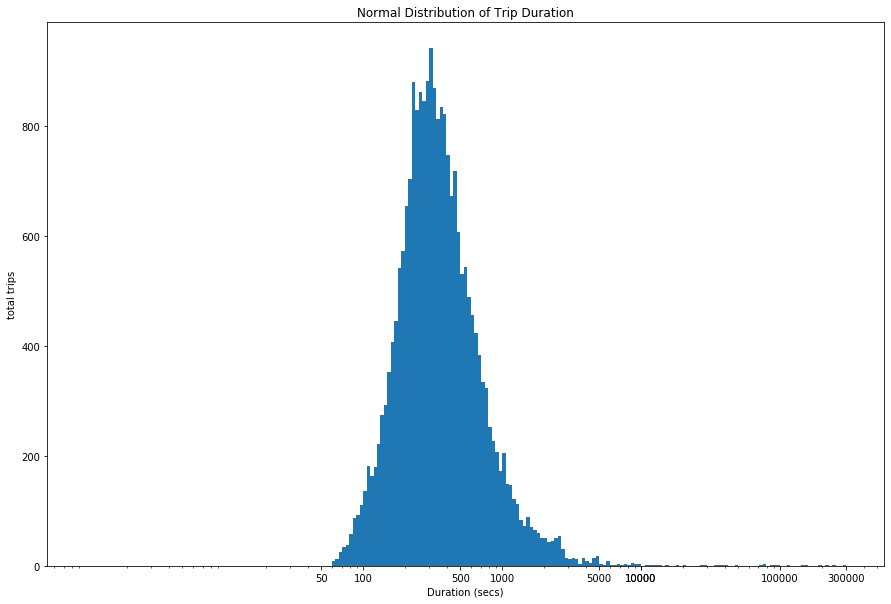

In [40]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)


plt.figure(figsize = [15,10])
plt.hist(data = df, x = 'duration_sec', bins =bins)
plt.xscale('log')
plt.xticks([50, 100, 500, 1000, 10000, 5000, 10000, 100000, 300000], [50, 100, 500, 1000, 10000, 5000, 10000, 100000, 300000])
plt.xlabel('Duration (secs)')
plt.ylabel('total trips')
plt.title('Normal Distribution of Trip Duration')

Trip duration is now normally distributed.

#### Rider's age

In [41]:
df.rider_age.describe()

count    22960.000000
mean        38.870035
std         10.300748
min         17.000000
25%         31.000000
50%         37.000000
75%         44.000000
max        132.000000
Name: rider_age, dtype: float64

In [42]:
#### a rider's age 132! this is unsual. Let's remove this outliers.

In [43]:
df[df['rider_age'] >=75]

,duration_sec,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender,start_time_month_name,start_time_weekday,start_time_day,start_time_hour,rider_age
3038,178,2020-02-04 18:54:41.561,2020-02-04 18:57:39.707,Warren St,Grove St PATH,29496,Subscriber,1888,0,February,Tue,4,18,132
3694,976,2020-02-05 12:48:53.916,2020-02-05 13:05:09.981,Washington St,Washington St,42220,Subscriber,1900,1,February,Wed,5,12,120
8507,226,2020-02-12 07:47:17.171,2020-02-12 07:51:03.941,Grove St PATH,Warren St,42185,Subscriber,1888,0,February,Wed,12,7,132
16074,378,2020-02-21 13:39:46.219,2020-02-21 13:46:04.617,Grove St PATH,Washington St,42593,Subscriber,1900,1,February,Fri,21,13,120


In [44]:
#drop ages more than 75
df = df[df['rider_age'] <=75]

In [45]:
df.rider_age.describe()

count    22956.000000
mean        38.854853
std         10.236920
min         17.000000
25%         31.000000
50%         37.000000
75%         44.000000
max         73.000000
Name: rider_age, dtype: float64

### Rider Age

In [46]:
df['rider_age'].describe()

count    22956.000000
mean        38.854853
std         10.236920
min         17.000000
25%         31.000000
50%         37.000000
75%         44.000000
max         73.000000
Name: rider_age, dtype: float64

Text(0.5, 1.0, 'Total trips vs Age')

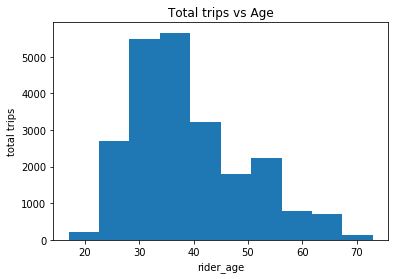

In [47]:
plt.hist(data = df, x = 'rider_age')
plt.xlabel('rider_age')
plt.ylabel('total trips')
plt.title('Total trips vs Age')

#### Most riders born between 1975 and 1990 and rheir ages between 30 and 40

### User Type

#### Q. Does the above depend on if a user is a subscriber or customer?

Text(0.5, 1.0, 'Total trips vs User Type')

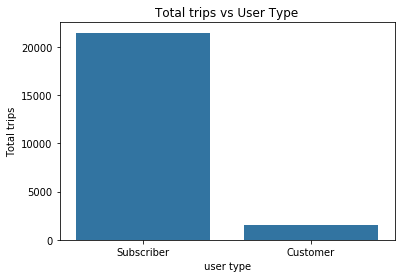

In [48]:
base_color = sb.color_palette()[0]
user_order = df['user_type'].value_counts().index
sb.countplot(data= df, x = 'user_type', color = base_color, order = user_order)
plt.xlabel('user type')
plt.ylabel('Total trips')
plt.title('Total trips vs User Type')

#### Subscribers are renting more bikes than regular customers

### Gender

Text(0.5, 1.0, 'Total trips vs gender')

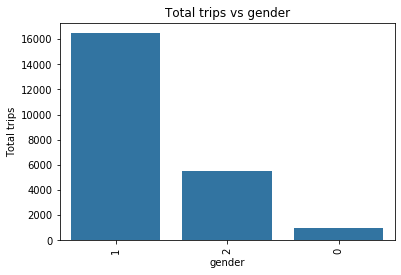

In [49]:
base_color = sb.color_palette()[0]
gender_order = df['gender'].value_counts().index
sb.countplot(data= df, x = 'gender', color = base_color, order = gender_order)
plt.xticks(rotation =90)
plt.xlabel('gender')
plt.ylabel('Total trips')
plt.title('Total trips vs gender')

#### Most riders are males

### Top 10 Start Stations

Text(0.5, 1.0, 'Top Ten Start Station')

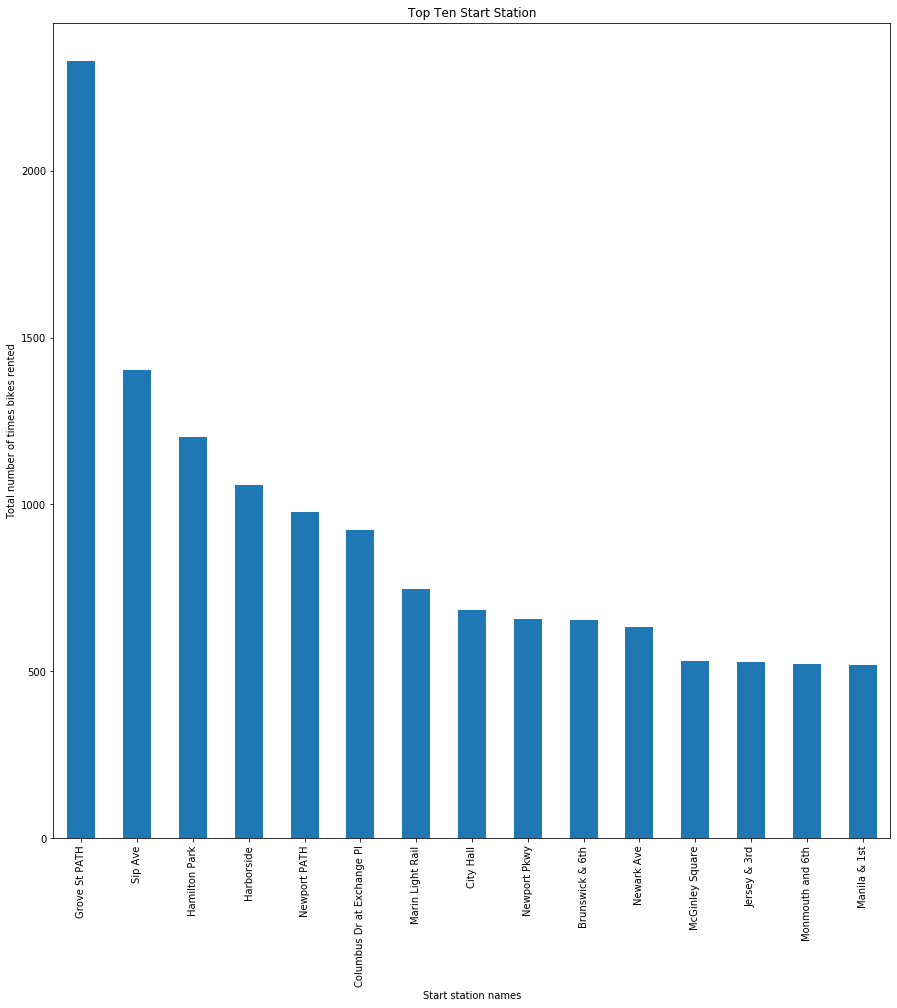

In [50]:
top_start_station.plot.bar(figsize = (15,15))
plt.xticks(rotation =90)
plt.xlabel('Start station names')
plt.ylabel('Total number of times bikes rented')
plt.title('Top Ten Start Station')

#### Visualization of top 10 start stations.
Grove St PATH, Sip ave, and Hamilton Park places are the most popular stations where people get their bikes.

### Top 10 End Stations

Text(0.5, 1.0, 'Top Ten End Station')

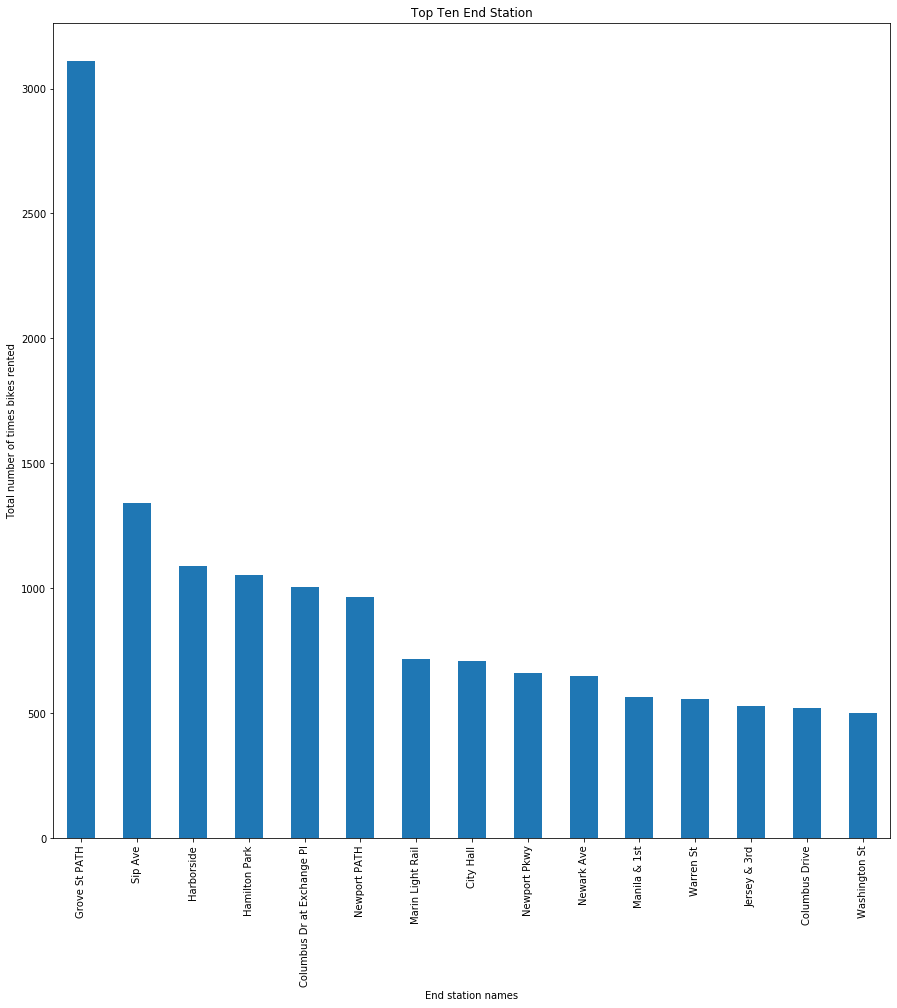

In [51]:
top_end_station.plot.bar(figsize = (15,15))
plt.xticks(rotation =90)
plt.xlabel('End station names')
plt.ylabel('Total number of times bikes rented')
plt.title('Top Ten End Station')

#### Visualization of top 10 end stations.
Grove St PATH, Sip ave, and Harborside places are the most popular stations where people return their bikes.

#### Q. How long does the average trip take?


In [52]:
df['duration_sec'].mean()

585.5905645582855

#### The average trip takes 660 seconds which equals to 10 minutes

In [53]:
top_trips = df.nlargest(10, ['duration_sec'])
top_trips

,duration_sec,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender,start_time_month_name,start_time_weekday,start_time_day,start_time_hour,rider_age
19204,290697,2020-02-25 07:16:57.800,2020-02-28 16:01:55.520,Lincoln Park,JCBS Depot,42326,Subscriber,1984,2,February,Tue,25,7,36
6293,245410,2020-02-08 21:55:24.948,2020-02-11 18:05:35.899,Sip Ave,Grove St PATH,42479,Customer,1996,1,February,Sat,8,21,24
12027,221936,2020-02-16 21:43:35.712,2020-02-19 11:22:32.337,Harborside,Dixon Mills,42369,Subscriber,1990,1,February,Sun,16,21,30
18466,197074,2020-02-24 10:03:17.788,2020-02-26 16:47:52.511,Newport Pkwy,Warren St,42178,Customer,1969,0,February,Mon,24,10,51
22840,157660,2020-02-29 16:48:59.735,2020-03-02 12:36:40.591,Marin Light Rail,Paulus Hook,42146,Customer,1983,1,February,Sat,29,16,37
22886,149410,2020-02-29 18:22:52.975,2020-03-02 11:53:03.380,Sip Ave,Leonard Gordon Park,42444,Customer,1969,0,February,Sat,29,18,51
8720,117897,2020-02-12 09:10:16.071,2020-02-13 17:55:13.933,Jersey & 3rd,5 Corners Library,42586,Customer,1969,0,February,Wed,12,9,51
12597,95085,2020-02-17 17:08:51.167,2020-02-18 19:33:37.104,Sip Ave,City Hall,42113,Customer,1969,0,February,Mon,17,17,51
5409,90388,2020-02-07 16:52:42.455,2020-02-08 17:59:10.919,Warren St,Warren St,42447,Customer,1969,0,February,Fri,7,16,51
16170,89655,2020-02-21 16:21:03.700,2020-02-22 17:15:19.025,Hilltop,Hilltop,42621,Customer,1969,0,February,Fri,21,16,51


## Bivariate Exploration


Here, I will visualize two variables to see the differences or similarities between them. Therefore, I will be able to see the trends.

### Trip Duration vs Age

Text(0, 0.5, 'Duration (sec)')

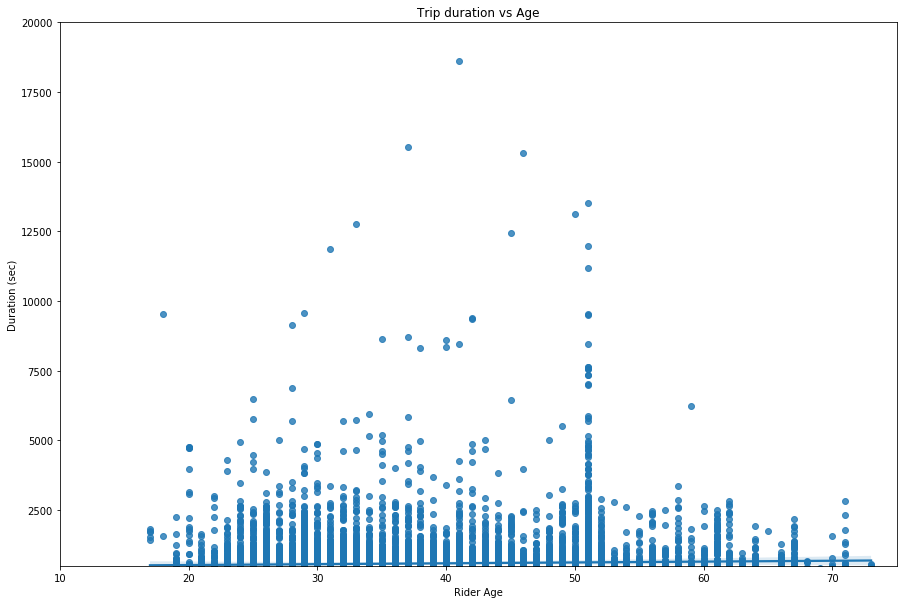

In [54]:
# let's do analysis on two variables (trip duration vs age)
plt.figure(figsize = [15,10])
sb.regplot(data = df, x = 'rider_age', y = 'duration_sec')
plt.axis([10, 75, 500, 20000])
plt.title('Trip duration vs Age')
plt.xlabel('Rider Age')
plt.ylabel('Duration (sec)')

#### Those riders who are between 35 and 50 years old, take bikes for a long period of time.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22956 entries, 0 to 22961
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   duration_sec           22956 non-null  int64         
 1   start_time             22956 non-null  datetime64[ns]
 2   stop_time              22956 non-null  datetime64[ns]
 3   start_station_name     22956 non-null  object        
 4   end_station_name       22956 non-null  object        
 5   bike_id                22956 non-null  object        
 6   user_type              22956 non-null  object        
 7   birth_year             22956 non-null  int64         
 8   gender                 22956 non-null  category      
 9   start_time_month_name  22956 non-null  object        
 10  start_time_weekday     22956 non-null  object        
 11  start_time_day         22956 non-null  int32         
 12  start_time_hour        22956 non-null  int64         
 13  r

### Rider Age vs Gender

(10.95778739278402, 79.74953094134327)

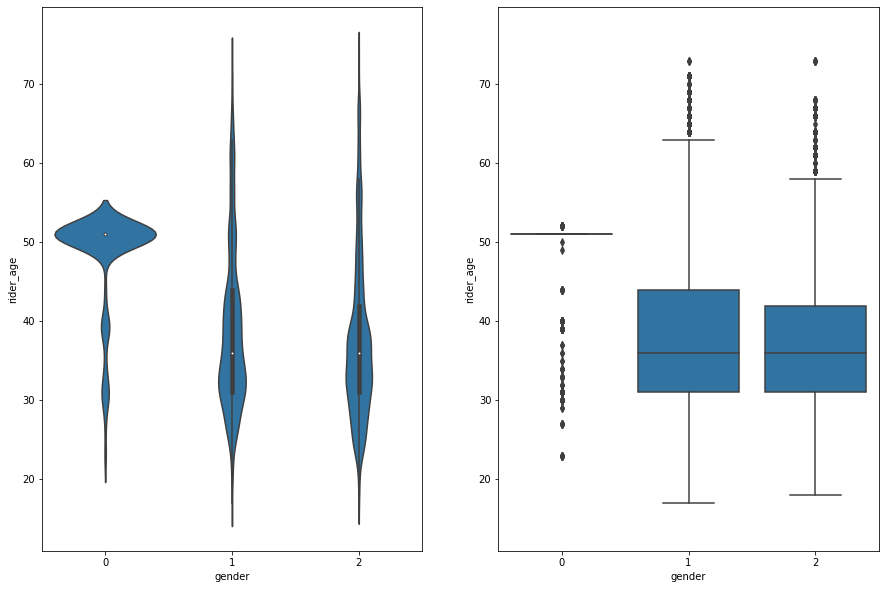

In [56]:
plt.figure(figsize = [15, 10])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'gender', y = 'rider_age', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'gender', y = 'rider_age', color = base_color)
plt.ylim(ax1.get_ylim()) 


#### The median age for both Males (1) and females (2) is 35 while the unknown gender is 50.

#### Plotting Summary Statistic

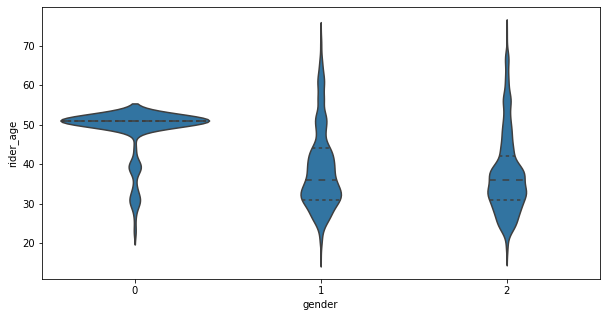

In [57]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'gender', y = 'rider_age', color = base_color,
              inner = 'quartile')

#### The median age for both Males (1) and females (2) is 35 while the unknown gender is 50.

### Rides Taken During the Week  by Gender

Text(0, 0.5, 'Total Rides')

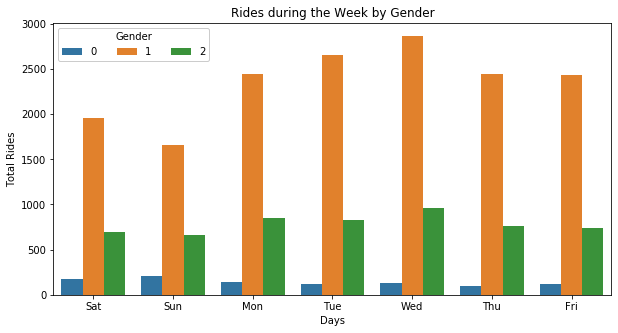

In [58]:
plt.figure(figsize = [10, 5])
ax = sb.countplot(data = df, x = 'start_time_weekday', hue = 'gender')
ax.legend(loc = 2, ncol = 3, framealpha = 1, title = 'Gender')
plt.title('Rides during the Week by Gender')
plt.xlabel('Days')
plt.ylabel('Total Rides')

#### Most males and females take Citi bikes on Wednesday or Tuesday while unknown gender takes bikes on Saturday or Sunday.

#### I have observed very interesting relationships between rider's age and gender, and total rides taken during the week by gender.
- Most males and females tend to take Citi bikes on Wednesday. 
- Those riders who are between 35 and 50 years old, take bikes for a long period of time.

## Multivariate Exploration

Visualizations of three of more variables
- three numeric variables
- two numeric variables and one categorical variable
- one numeric variable and two categorical variables
- three categorical variables

### Riders' Age vs User Type by Gender

<Figure size 720x720 with 0 Axes>

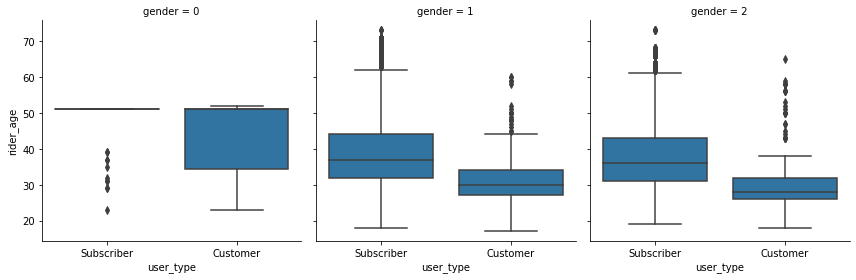

In [59]:
plt.figure(figsize = [10, 10])
g = sb.FacetGrid(data = df, col = 'gender', size = 4)
g.map(sb.boxplot, 'user_type', 'rider_age')

Most males and females are subscribers who are between 30 and 45, and the median age is 35. On the other hand, the unknown gender is the customer (age 40-50). 

### Riders' Age and Gender by User Type

<Figure size 720x720 with 0 Axes>

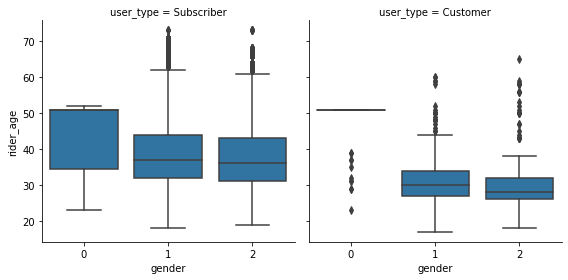

In [60]:
plt.figure(figsize = [10, 10])
g = sb.FacetGrid(data = df, col = 'user_type', size = 4)
g.map(sb.boxplot, 'gender', 'rider_age')

Both females and males prefer to get the annual membership.

### Weekly usage of Citi Bike per user type and gender

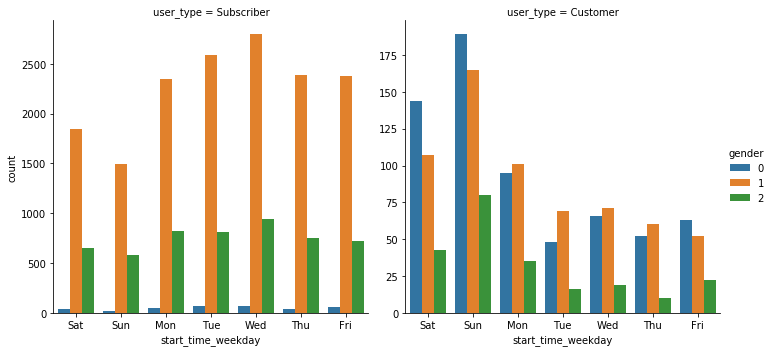

In [61]:
g = sb.catplot(data= df, x = 'start_time_weekday', col = 'user_type', hue= 'gender', kind = 'count', sharey= False)


Customers tend to take bike on Saturday and Sunday while subscribers tend to take bike on Wednesday

### Hourly usage of Citi Bike per user type and gender

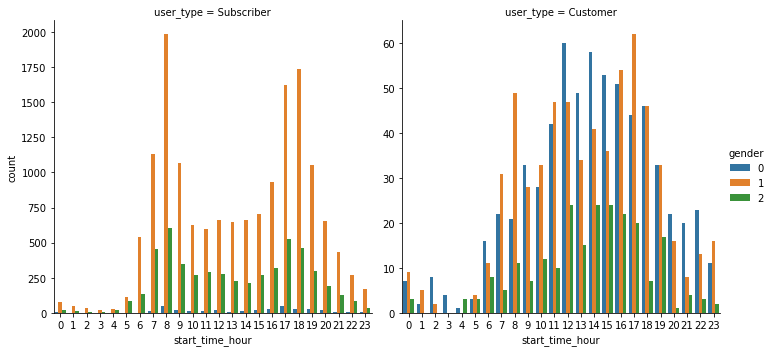

In [62]:
g = sb.catplot(data= df, x = 'start_time_hour', col = 'user_type', hue= 'gender', kind = 'count', sharey= False)


Male customers take more bikes from 12 to 8 pm while male subscribers take bikes from 7 pm to 9 pm.

- https://www.citibikenyc.com/system-data
- https://s3.amazonaws.com/tripdata/index.html
- https://en.wikipedia.org/wiki/Citi_Bike